# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**<br>

No the smartcab is stationary throughout the entire simulation.<br><br>

The driving agent receives positive rewards when it is doing desired actions for example when the light is red it's the status "idling at red light" is desired and the driver is rewarded. The driving agent receives negative rewards when it is doing undesired actions, for example when the light is green the status "idling at green light with no crosstraffic" is undesireable and the driver is punished.<br><br>

Changing the color of the light affects the desired output of the car and thus the rewards the driving agent receives. In this first example:<br>
Stationary car + green light = Negative rewards<br>
Stationary car + red light  = Positive rewards<br>
However, after inspecting the code further there are cases when the car could be stationary at a green light and not receive negative rewards. For example if the SmartCab desired to turn left and oncoming traffic was moving forward. In this case the desired action (and the positive rewards) is idle until traffic is clear.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**<br>

<b>In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.</b><br>
verbose     - set to True to display additional output from the simulation. This flag forces the program to print data helpful for debugging.<br>
 num_dummies - discrete number of dummy agents in the environment, default is 100. This flag set the number of other cars that are in the environment.<br>
 grid_size   - discrete number of intersections (columns, rows), default is (8, 6). This flag changes the size of the world.<br>
 learning   - set to True to force the driving agent to use Q-learning. This flag turns Q-Learning on and off.<br>
 epsilon - continuous value for the exploration factor, default is 1. This is the starting value for epsilon.<br>
 alpha   - continuous value for the learning rate, default is 0.5. This is the starting value for alpha.<br>
 enforce_deadline - set to True to enforce a deadline metric.This flag changes the time limit from the hardcoded 100 to a number that varies based on the trial.<br>
 update_delay - continuous time (in seconds) between actions, default is 2.0 seconds. This flag determines how much time passes with each time step.<br>
 display      - set to False to disable the GUI if PyGame is enabled. This flag enables or disables the pygame gui<br>
 log_metrics  - set to True to log trial and simulation results to /logs. This flag enables or disable the printing of results to the log file <br>
 optimized    - set to True to change the default log file name. This flag changes the name of the log files.<br>
 tolerance  - epsilon tolerance before beginning testing, default is 0.05. This is the threashold for when testing will begin.<br>
 n_test     - discrete number of testing trials to perform, default is 0. This is how many test trial will be used in the safety and reliability scores.<br>
 
 
<b> In the environment.py Python file, what Environment class function is called when an agent performs an action?</b><br>
act(self, agent, action): -Consider an action and perform the action if it is legal. Receive a reward for the agent based on traffic laws. <br>

<b>In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?</b><br>
Render_text is the non-gui text output, where text is printed to the command prompt. Render is the gui output, where text (and images) are rendered to the pygame gui.<br>

<b>In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?</b><br>
The East-West direction will be considered first.<br>


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


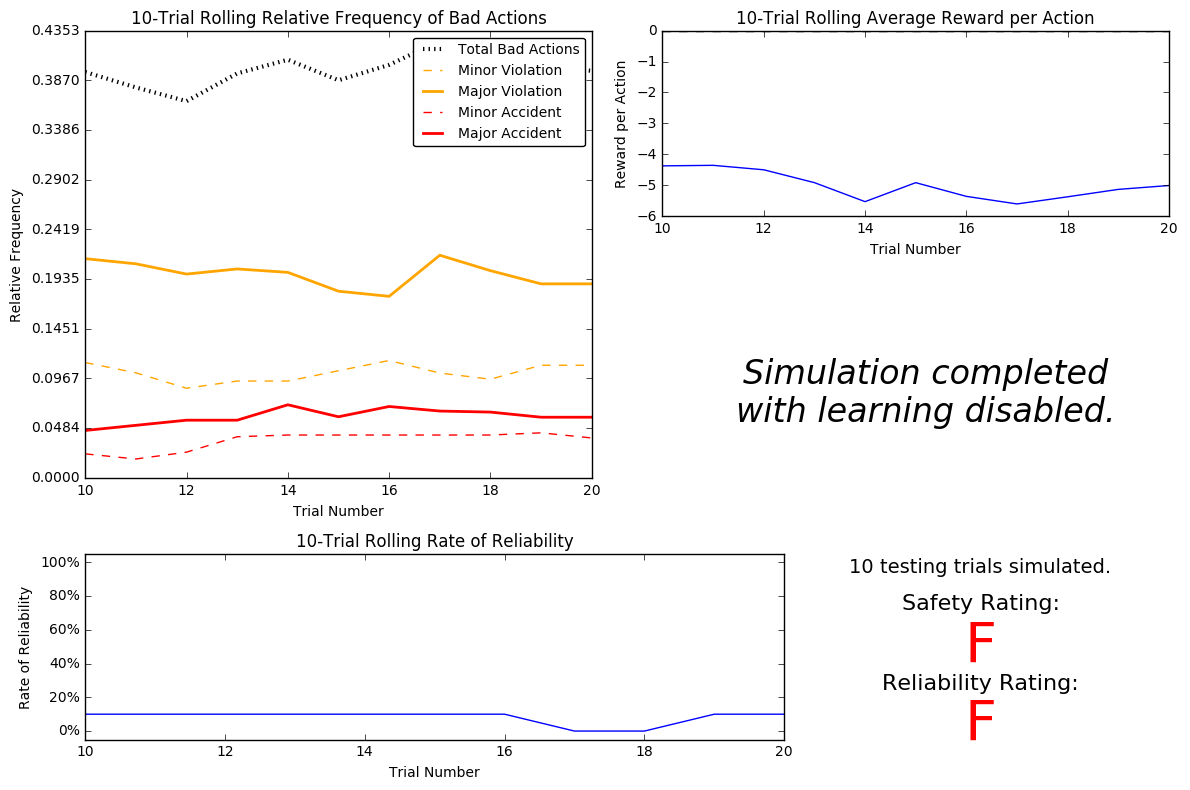

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**<br>

10 Trial Rolling Relative Frequency of Bad Decisions:<br>
The driving agent is making bad decisions on a consistant basis, a frequency between 0.3790 and .3369, and an accident frequency between ~0.08 and ~.12, across the 20 trials. Specifically Majory/Minor Accidents and Minor Violations remain consistent while the Major Violations dipped a little towards the end pulling the total Bad Decisions down with it. As the number of trials increases we do not see a significant shift in results for either direction which is to be expected as a random agent should make a consistent ratio of good to bad decisions.<br>

10-Trial Rolling Average Reward per Action:<br>
The driving agent continues to receive between -4 and -5 rewards points throughout the trials. This means that A) there is no improvement and B) even if the agent is making equal parts good decisions (positive rewards) and bad decisions (negative rewards) it is being penilized much more heavly for the poor decisions leaving it in a deeply negative sum unstead of a more netural 0 position. <br>

10-Trial Rolling Rate of Reliablity:<br>
The driving agent has an almost level rate of reliability between 20% and 40%. This is expected because even as the agent parcipates in more and more trials it does not improve because its logic remains the same. <br>

10 Test Simulated:<br>
This would most definitely would not be a considered a safe and/or reliable conductor for vehicles of any type given it's high frequency of bad decisions and low rate of reliabilty both summed up by the giant F's it received in the testing trials.<br>


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**<br>

For safety I argue that left, right, and oncoming are the most important because they directly convey information about whether the Smartcab will experience a collision in given the next desired state. I chose to leave light out of this group on purpose. In real-life yes, the light is very important, and is put in place to protect us from accidents. However, in the simulation we can be 100% confident that there is no traffic left, right, or oncoming therefore we can conjecture that a motion into the intersection would not result in an accident but a violation. In my definitons of my simulated world, violations are not safety risks but instead financial risks. <br>

For efficiency I believe waypoint, and possibly (depending on your logic) light. Knowing which way is the desired direction is important for deciding if this is an efficient plan or not. If you choose to obey the laws light is also an important feature because if the light is red you can't move and thus this will affect if you can arriving at your destation before/by the deadline. <br>

Deadline however will not be included in my statespace because the SmartCab will ALWAYS try to arrive at as fast as possible. Therefore it does not matter how much time it has left, it's never going to "take the scenic route".

From this point forward I will assume that collecting the maximum reward possible is desired and looking ahead I can see that violations are not desired actions and receive negative rewards. So because of this I will include light in my state-space and right will not. The reason being is that if we know the light is red and we know that the other cars always obey the light the desired actions of the car to the right of us will never affect our decision making process. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**<br>

After looking at the Enviroment code I can see that the options for:<br>
Waypoint are forward, left, right (3)<br>
light are red, green (2)<br>
Oncoming are None, 'forward', 'left', 'right' (4)<br>
Left are None, 'forward', 'left', 'right' (4)<br>




3 X 2 X 4 X 4  = 96

Given a LARGE amount of time I believe the smartcab could learn a policy for each possible state but given a REASONABLE amount my answer is no. However within a reasonable amount of time (less than 200 trials) I believe the SmartCab could learn a 'Good Enough' policy that would still allow it to preform well in tests.




### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

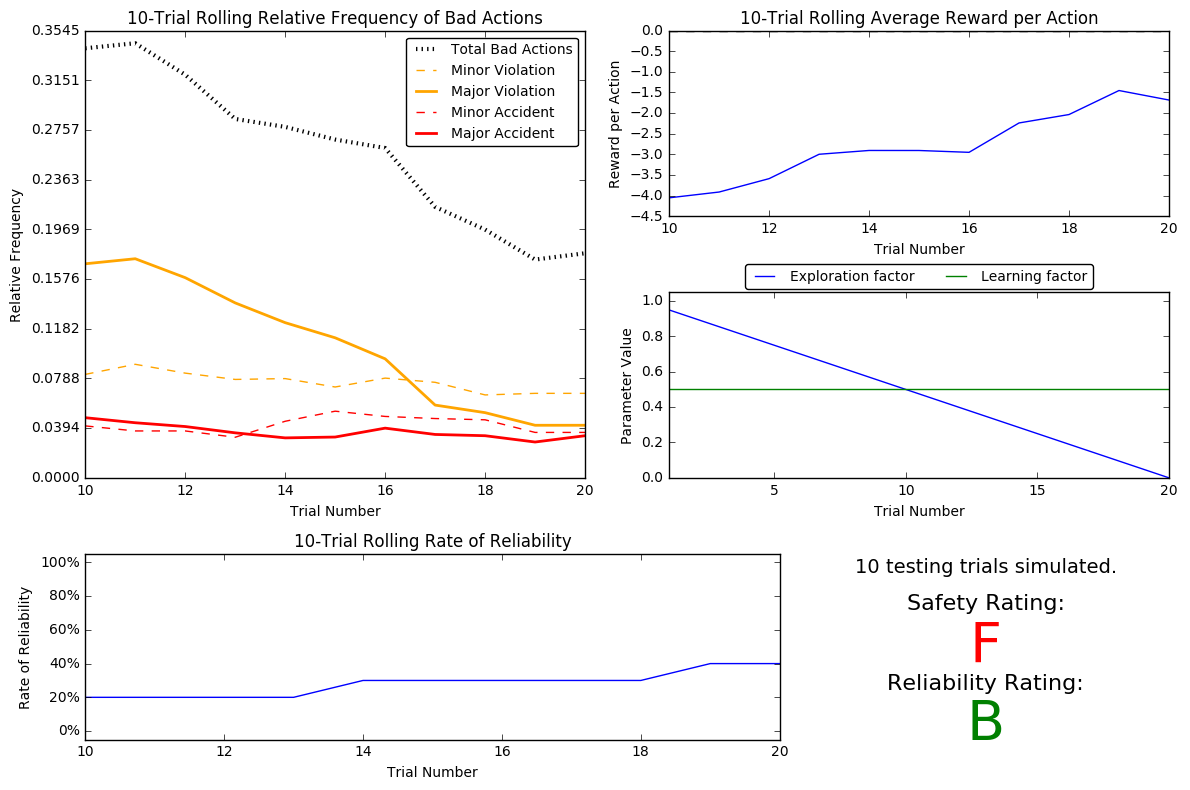

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**<br>
<b>Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?</b><br>
Both they basic agent and the default Q-Learning agent start off with similar results in the first few trials. It is not until later that the Q-Learning agent begins to improve. 

<b>Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?</b><br>
20 Which makes sense because it's a linear decay of 0.05 each step. 1/0.05 = 20 training trials.<br>

<b>Is the decaying function you implemented for  ϵϵ  (the exploration factor) accurately represented in the parameters panel?</b><br>
No, in this moment there is no way to change the decay rate from the parameters panel.

<b>As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?</b><br>
As the number of training trials increased both the number of bad actions and average rewards improved in their respective directions. 

<b>How does the safety and reliability rating compare to the initial driving agent?</b><br>
The safety rating continues to be 'F' failing due to continued occurence of Major Accidents. Because these accidents occure less frequently the program has not had enough time to learn how to avoid them. Reliability however has seen significant improvement.<br>


The charts show a large amount of improvement from the naive trial. Minor and Major violations drop-off greatly and while it appears the system could use more time to see and learn  major accidents they still too decrease. As the exploration factor decreases the reliablity and average reward increase as to be expect because the SmartCab is now choosing the "best" option more often.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

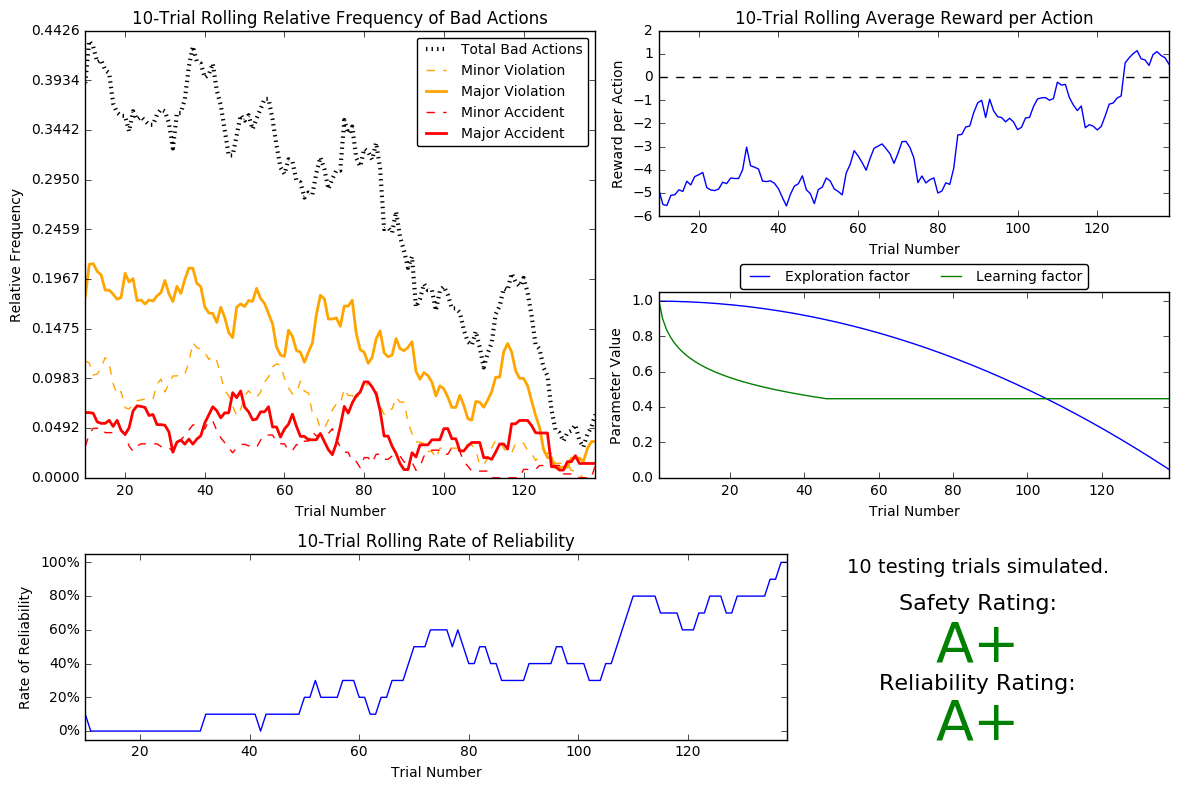

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**<br>

<b>What decaying function was used for epsilon (the exploration factor)?</b><br>
epsilon = epsilon_initial_value - 0.00005*self.num_trials^2

<b>Approximately how many training trials were needed for your agent before begining testing?</b><br>
Near 140

<b>What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?</b><br>
Epsilon-tolerance=0.05 and alpha=1 with a decay rate of:<br>
alpha = alpha_initial_value - (1- log(num_trials/total_trials)/log(1.0/total_trials)) until alpha is less that 0.45, from that point  forward alpha does not decay futher. <br>
I used the default epsilon-tolerance give the fact that adding of subtracting from this number didn't really change the run-time much because the slop of the epsilon decay is very sharpe when epsilon values are small. I choose to have a decaying alpha to take advantage of the idea that in the first few trial runs the majority of states we see will be new. 

<b>How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?</b><br>
Reliability Rating increased from a 'B' value to '+A' on the testing sets. Safety Rating increased from a 'F' to '+A'.

<b>Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?</b><br>
Yes, I would say a top score in both catagories signifies that we have learned the correct policy.

<b>Are you satisfied with the safety and reliability ratings of the Smartcab?</b><br>
Yes. In this case we received the top ratings. 

Overall forcing the smartcab to explore more often for a greater set of trails improved the preformance as can be seen in all the charts above. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** <br>
Good policies include: idling (None) at red lights, avoiding colisions (None) with nearby cars, proceeding(forward,right,left) in the desired direction (forward,right,left), and (slightly more complex) making a right turn(right) if desired (right) on red if traffic is clear(None).

Here is an example of a policy that is preforming as expected. The red light and the traffic would cause major accidents if the SmartCab did anything but remain stationary. As you can see all the states of this statespace have been explored and as expected everything except for the None value are associted with very negative rewards. 

('left', 'red', 'forward', 'forward')
 -- forward : -29.49
 -- None : 1.62
 -- right : -13.70
 -- left : -23.08


Here is an example of a policy that is not as expected. This car should follow it's desired waypoint and continue forward but it appears that the policy is to go right. Given that the other three action values are 0.0 I assume that the SmartCab has only reached this state one time and therefore the only information it has if for the action 'right'. Given that no harm will be caused by 'right' action a positive value makes sense. The hope is that if the car were to reach this state again and try the forward route it would find a much larger positive reward.  <br>

('forward', 'green', 'forward', 'left')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.11
 -- left : 0.00


 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**<br>

The Environment:
future rewards does not work in this situtation because the target destintation changes with every trial. While the SmartCab may have been rewarded greatly in one trial it will not recieve the same reward in the next because the desired bearing will be in a different direction.

The SmartCab:
Future rewards does not work in this situtation because the SmartCab does it's route planning and Q-learning in seperate steps. When making decisions based on the Q dictionary the system already knows which direction it would like to drive. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.